# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

### Sinh viên không được phép sử dụng internet
### Sinh viên sau khi làm bài xong xuất ra file PDF đồng thời nộp lên Fit-lab và push lên git-hub
### Sinh viên làm bắt đầu làm bài từ 15h40 - 18h00

In [126]:
# Họ và Tên: Đào Duy Luân
# MSSV: 2174802010599

In [127]:
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.optim import SGD
from torch.utils.data import DataLoader, TensorDataset

In [128]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y
#Điền ở đây
X,y = load_dataset()
print((X.shape,y.shape))

((100, 4), (100,))


*Kết* quả: (100, 4) (100,)

(100, 4) (100,)


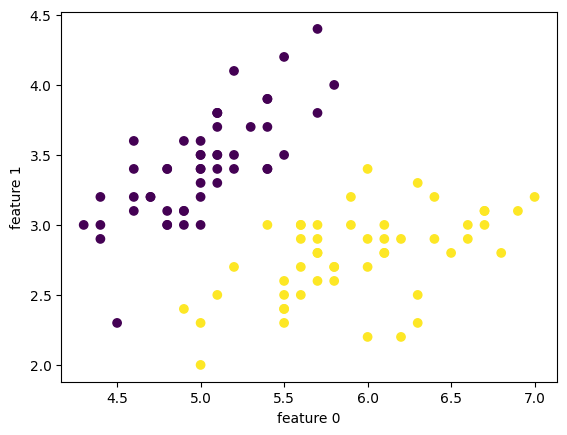

In [129]:
#Trực quan hóa dữ liệu data
#Điền code ở đây
#Trực quan hóa dữ liệu data
#Điền code ở đây
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y
#Điền ở đây
X,y = load_dataset()
print( X.shape,y.shape )
plt.scatter(X[:,0], X[:, 1], c=y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()


Kết quả

# ![image.png](attachment:image.png)

In [130]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        #Điền ở đây theo comment                # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra
        self.linear = nn.Linear(n_features, 1)
    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [131]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)#Điền ở đây theo comment            #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)

    def __getitem__(self, idx):
        return  self.X[idx], self.y[idx]#Điền ở đây theo comment            #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [132]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

In [133]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
total_size = len(dataset)
train_size = int(0.7 * total_size)                                              #70%
test_size = total_size - train_size                                               #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [134]:
from importlib.abc import Loader
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [135]:
# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model = LogisticRegressTorch(n_features)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [136]:
# Huấn luyện mô hình
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 0.8040, Test Loss: 0.8194, Test Accuracy: 0.4000
Epoch 2/200, Train Loss: 0.6436, Test Loss: 0.7441, Test Accuracy: 0.4000
Epoch 3/200, Train Loss: 0.5934, Test Loss: 0.6633, Test Accuracy: 0.4000
Epoch 4/200, Train Loss: 0.5432, Test Loss: 0.6077, Test Accuracy: 0.4333
Epoch 5/200, Train Loss: 0.5078, Test Loss: 0.5405, Test Accuracy: 0.6000
Epoch 6/200, Train Loss: 0.4705, Test Loss: 0.5121, Test Accuracy: 0.7333
Epoch 7/200, Train Loss: 0.4542, Test Loss: 0.4913, Test Accuracy: 0.8667
Epoch 8/200, Train Loss: 0.4422, Test Loss: 0.4738, Test Accuracy: 0.9667
Epoch 9/200, Train Loss: 0.4326, Test Loss: 0.4696, Test Accuracy: 0.9667
Epoch 10/200, Train Loss: 0.4279, Test Loss: 0.4538, Test Accuracy: 0.9667
Epoch 11/200, Train Loss: 0.4185, Test Loss: 0.4320, Test Accuracy: 1.0000
Epoch 12/200, Train Loss: 0.4086, Test Loss: 0.4346, Test Accuracy: 1.0000
Epoch 13/200, Train Loss: 0.4067, Test Loss: 0.4245, Test Accuracy: 1.0000
Epoch 14/200, Train Loss: 0.4001, 

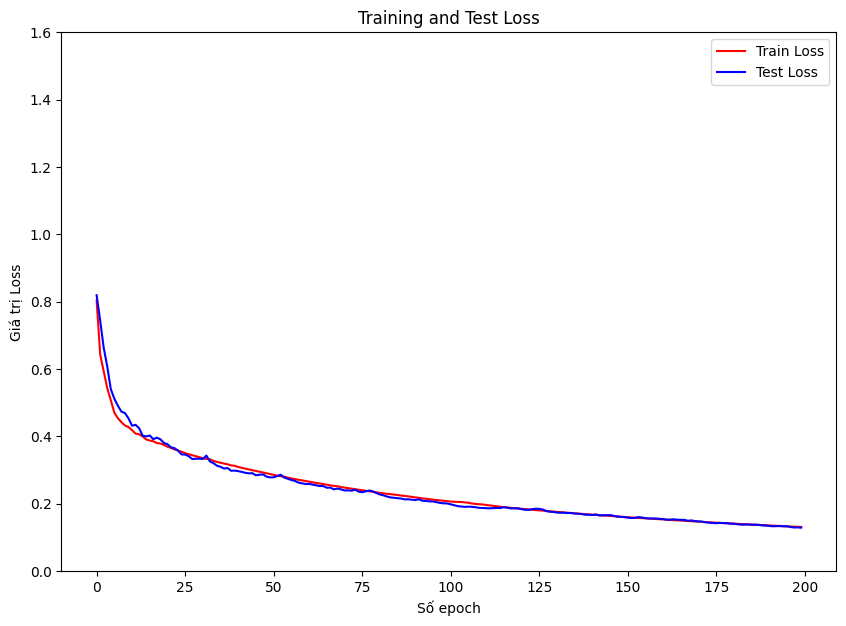

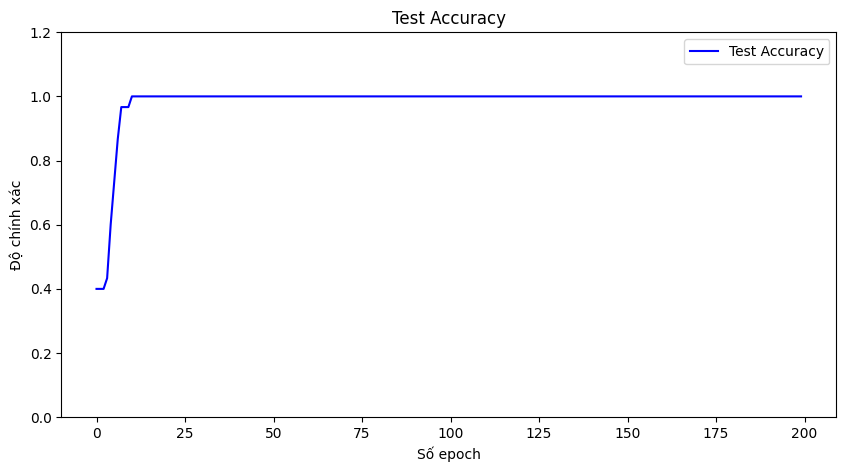

In [141]:
# Vẽ biểu đồ loss và accuracy
# Vẽ biểu đồ loss
plt.figure(figsize=(10, 7))
plt.plot(train_losses, label='Train Loss', color='red')
plt.plot(test_losses, label='Test Loss', color='blue')
plt.xlabel('Số epoch')
plt.ylabel('Giá trị Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.ylim(0, 1.6)  # Đặt giá trị tối đa cho trục Y là 1.6
plt.show()

# Vẽ biểu đồ accuracy
plt.figure(figsize=(10, 5))
plt.plot(test_accuracies, label='Test Accuracy', color='blue')
plt.xlabel('Số epoch')
plt.ylabel('Độ chính xác')
plt.title('Test Accuracy')
plt.legend()
plt.ylim(0, 1.2)  # Đặt giá trị tối đa cho trục Y là 1.0
plt.show()

#Kết quả:

![image.png](attachment:image.png)